# Bitcoin Price Prediction Project Documentation

This Jupyter Notebook project is focused on **Bitcoin price prediction** using 3 different machine learning models:

- Linear Regression
- XGBoost
- LSTM (Long Short-Term Memory)
<br> <br>

The dataset is collected using the Yahoo Finance API (`yfinance`) and includes 5 years of historical BTC-USD OHLCV data.

The project follows a modular structure, with each component such as data collection, preprocessing, modeling, and evaluation defined in separate Python scripts.


## 🤖 Models Used

### 1. Linear Regression
**File:** `linear_regression_model.py`

- Handles both scaled and unscaled data
- Automatically inverse transforms using the `MinMaxScaler`

**Evaluation (Unscaled):**

- RMSE: \$2,219.67
- MAE:  \$1,616.53
- R²:   0.9314 ✅

**Notes:**

Although **Linear Regression** showed the best performance based on R² and error metrics, this result is misleading. This model captures only simple linear patterns and assumes independence between features. In highly volatile markets like cryptocurrency, such assumptions break down quickly. The model's good performance is likely due to **overfitting on historical trends** or **smooth market segments**.

In real-world scenarios, Linear Regression generally fails to capture:

- Non-linear price behaviors
- Market sentiment and news impact
- High volatility and abrupt jumps

> ✅ *Conclusion:* Not suitable for real-world crypto forecasting despite seemingly strong metrics in a controlled experiment.

---

### 2. XGBoost

**File:** `xgboost_model.py`

- Powerful gradient boosting model
- Fully tunable

**Evaluation:**

- RMSE: \$6,131.93
- MAE:  \$4,908.51
- R²:   0.4762 ❌

**Notes:**

XGBoost is widely used in **real-world financial and time series applications**, and it's known for its **robustness and performance**. However, in this project, it performed poorly.

Possible reasons:

- Inadequate **hyperparameter tuning**
- Insufficient **feature richness** (XGBoost needs strong features)
- Possibly **data leakage** or **misaligned data**

Despite efforts to improve the model (as noted during project development), the current results do not reflect XGBoost's potential.

> ✅ *Conclusion:* While current performance is weak, XGBoost **can be a strong candidate** in real projects — but only when properly tuned with rich feature sets.

---

### 3. LSTM (Long Short-Term Memory)

**File:** `lstm_model.py`

- Deep learning model using `Keras`
- Uses sequences of `time_steps=60`
- Handles reshaping, training, evaluation

**Evaluation:**

- RMSE: \$7,563.33
- MAE:  \$6,195.27
- R²:   0.8165 ✅

**Notes:**

LSTM models are explicitly designed for **sequential data** and **time-series forecasting**. They maintain memory over past observations, making them highly suited for **financial data with temporal dependencies**.

Advantages:

- Captures temporal patterns
- Handles sequences and lagged dependencies
- Scalable with deeper architectures (e.g., stacked LSTM, Bidirectional LSTM)

Opportunities for improvement:

- Longer training and more epochs with regularization
- Use of **external data** (sentiment, macroeconomic indicators)
- Applying **hybrid models** (e.g., ARIMA + LSTM or CNN-LSTM)

> ✅ *Conclusion:* Best candidate for this problem type. With more data and advanced tuning, LSTM would likely outperform all others.

---

In [ ]:
from data_collection_yfinance import get_crypto_data
from data_analyze import data_analyze
from data_visualization import plot_data
from data_preprocessing import data_preprocessing
from data_split import split_data_for_time_series
import linear_regression_model as lr_models
from lstm_model import LSTMModel
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import random
from xgboost_model import XGBoostModel
import numpy as np

seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

## 🔧 Data Collection And Analyze

**File:** `data_collection_yfinance.py`

- Uses `yfinance.download()` to fetch data for BTC-USD.
- Cleans MultiIndex columns.
- Keeps relevant columns: `Open`, `High`, `Low`, `Close`, `Volume`.


Features added:

- Lagged features (e.g., `Close_lag1`)
- Technical indicators (e.g., `SMA`, `RSI`, `Bollinger Bands`)
- Date-time features (`Year`, `Month`, `Day`, `DayOfWeek`)
- Optional MinMax scaling


Additional utility functions:

- `add_datetime_features(df)`
- `add_technical_indicators(df)`
- `scale_data(df, columns)`

In [2]:
df = get_crypto_data(period= "3y")

[*********************100%***********************]  1 of 1 completed

Data downloaded successfully.


In [3]:
data_analyze(df,"BTCPrediction")


===== Analysis of BTCPrediction Data =====

First few rows of the dataset:
Price               Open          High           Low         Close  \
Date                                                                 
2022-07-03  19242.095703  19558.269531  18966.951172  19297.076172   
2022-07-04  19297.314453  20258.748047  19063.066406  20231.261719   
2022-07-05  20225.353516  20635.466797  19341.232422  20190.115234   
2022-07-06  20194.619141  20595.529297  19823.511719  20548.246094   
2022-07-07  20547.814453  21771.816406  20296.103516  21637.587891   

Price            Volume  
Date                     
2022-07-03  16390821947  
2022-07-04  21594638208  
2022-07-05  26715546990  
2022-07-06  24598943708  
2022-07-07  25814972520  

Summary statistics:
Price           Open           High            Low          Close  \
count    1096.000000    1096.000000    1096.000000    1096.000000   
mean    50885.232338   51829.444949   49960.418077   50964.400025   
std     28961.009910   

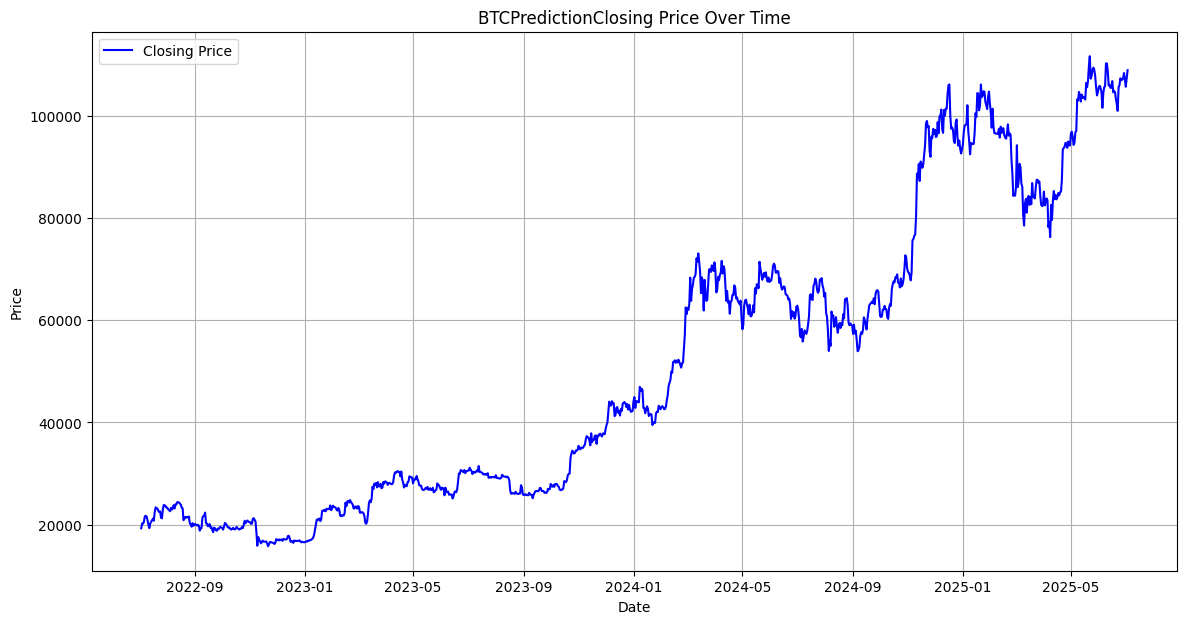

In [4]:
plot_data(df, "BTCPrediction")

## 📈 Data Preprocessing

**File:** `data_preprocessing.py`



Features added:

- Lagged features (e.g., `Close_lag1`)
- Technical indicators (e.g., `SMA`, `RSI`, `Bollinger Bands`)
- Date-time features (`Year`, `Month`, `Day`, `DayOfWeek`)
- Optional MinMax scaling

Additional utility functions:

- `add_datetime_features(df)`
- `add_technical_indicators(df)`
- `scale_data(df, columns)`

In [5]:
df, scaler = data_preprocessing(
    df,
    lag_days=1,
    add_datetime_features_flag=True,
    add_technical_flag=True,
    scale_data_flag=False
)

📊 Starting data preprocessing pipeline (v2)...
🔁 Creating lagged features for 1 days...

Adding datetime features...
datetime features Added
Adding technical indicators...
Technical indicators added.
✅ Preprocessing complete.


In [6]:
data_analyze(df,"BTCPrediction")


===== Analysis of BTCPrediction Data =====

First few rows of the dataset:
Price              Close     Open_lag1     High_lag1      Low_lag1  \
Date                                                                 
2022-07-24  22609.164062  22706.984375  22977.210938  22002.910156   
2022-07-25  21361.701172  22465.509766  22974.001953  22306.839844   
2022-07-26  21239.753906  22607.156250  22649.121094  21361.642578   
2022-07-27  22930.548828  21361.121094  21361.121094  20776.816406   
2022-07-28  23843.886719  21244.169922  22986.529297  21070.806641   

Price         Close_lag1   Volume_lag1  Year  Month  Day  DayOfWeek  \
Date                                                                  
2022-07-24  22465.478516  2.402180e+10  2022      7   24          6   
2022-07-25  22609.164062  2.356550e+10  2022      7   25          0   
2022-07-26  21361.701172  3.557456e+10  2022      7   26          1   
2022-07-27  21239.753906  2.862467e+10  2022      7   27          2   
2022-07

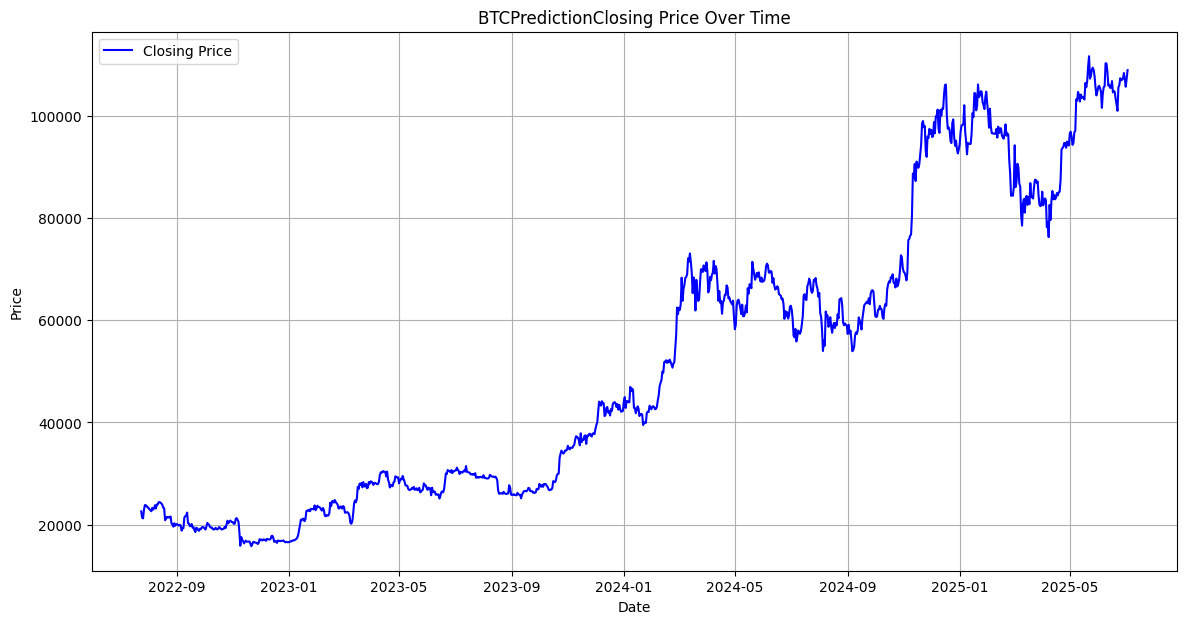

In [7]:
plot_data(df, "BTCPrediction")

## 📊 Data Splitting

**File:** `data_split.py`



- Chronological train/test split (default 80/20)

In [8]:
X_train, X_test, y_train, y_test = split_data_for_time_series(df, target_column="Close", train_ratio=0.8)


Splitting data for time series...
Data split complete: 860 rows for training, 215 rows for testing.


### 1. Linear Regression

**File:** `linear_regression_model.py`

- Handles both scaled and unscaled data
- Automatically inverse transforms using the `MinMaxScaler`

**Evaluation (Unscaled):**

- RMSE: \$2,219.67
- MAE:  \$1,616.53
- R²:   0.9314 ✅

**Notes:**

Although **Linear Regression** showed the best performance based on R² and error metrics, this result is misleading. This model captures only simple linear patterns and assumes independence between features. In highly volatile markets like cryptocurrency, such assumptions break down quickly. The model's good performance is likely due to **overfitting on historical trends** or **smooth market segments**.

In real-world scenarios, Linear Regression generally fails to capture:

- Non-linear price behaviors
- Market sentiment and news impact
- High volatility and abrupt jumps

> ✅ *Conclusion:* Not suitable for real-world crypto forecasting despite seemingly strong metrics in a controlled experiment.


Linear Regression model initialized (Flexible Version).
Training the model...
Model training complete.

Evaluating model performance...
No scaler provided. Evaluating on original scale.
Root Mean Squared Error (RMSE): $2,219.67
Mean Absolute Error (MAE):      $1,616.53
R-squared (R²):                 0.9314

Visualizing the results...
No scaler provided. Evaluating on original scale.


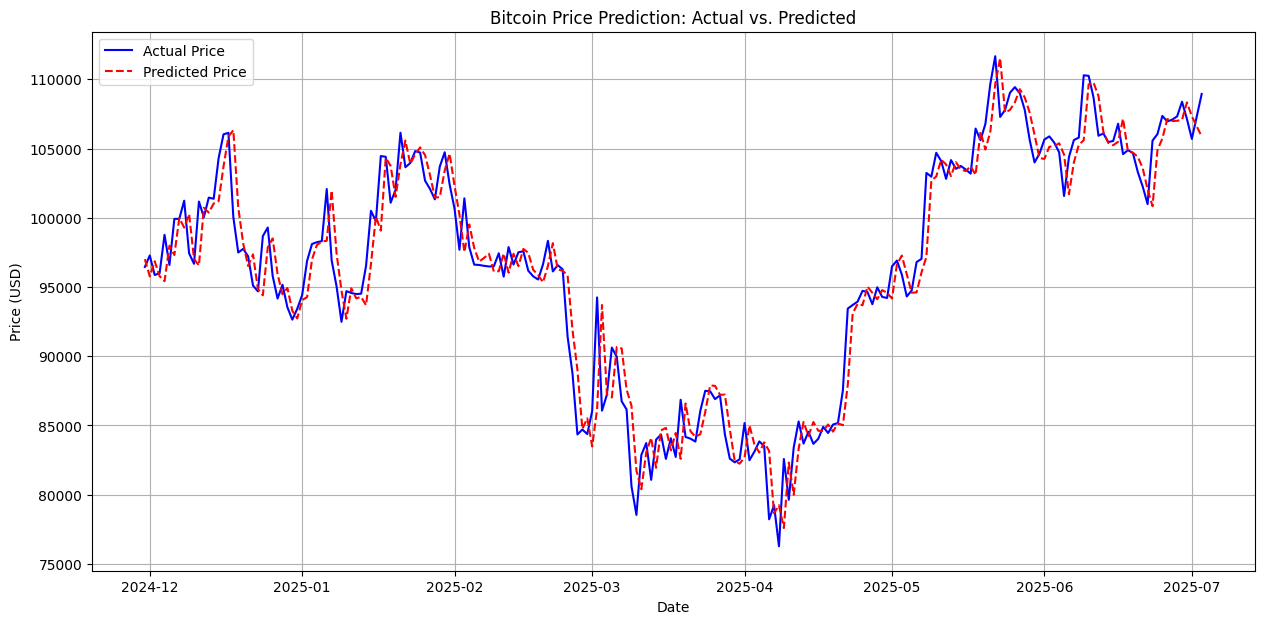

In [9]:
#Overfiting
lr_model = lr_models.LinearRegressionModel()
lr_model.train(X_train, y_train)
metrics = lr_model.evaluate(X_test, y_test)
lr_model.plot_results(X_test, y_test)

### 2. XGBoost

**File:** `xgboost_model.py`

- Powerful gradient boosting model
- Fully tunable

**Evaluation:**

- RMSE: \$6,131.93
- MAE:  \$4,908.51
- R²:   0.4762 ❌

**Notes:**

XGBoost is widely used in **real-world financial and time series applications**, and it's known for its **robustness and performance**. However, in this project, it performed poorly.

Possible reasons:

- Inadequate **hyperparameter tuning**
- Insufficient **feature richness** (XGBoost needs strong features)
- Possibly **data leakage** or **misaligned data**

Despite efforts to improve the model (as noted during project development), the current results do not reflect XGBoost's potential.

> ✅ *Conclusion:* While current performance is weak, XGBoost **can be a strong candidate** in real projects — but only when properly tuned with rich feature sets.


XGBoost model initialized.
Training XGBoost model... (this may take some time)
Training complete.

Evaluating model performance...
Root Mean Squared Error (RMSE): $6,131.93
Mean Absolute Error (MAE):      $4,908.51
R-squared (R²):                 0.4762

Plotting actual vs predicted values...


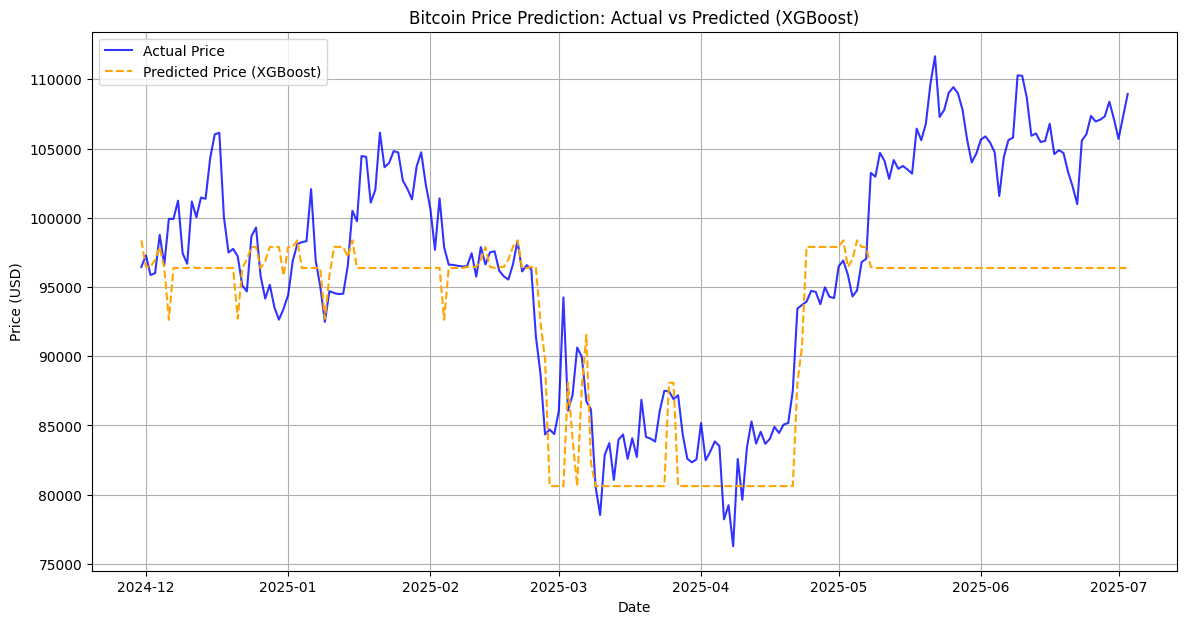


Plotting feature importances...


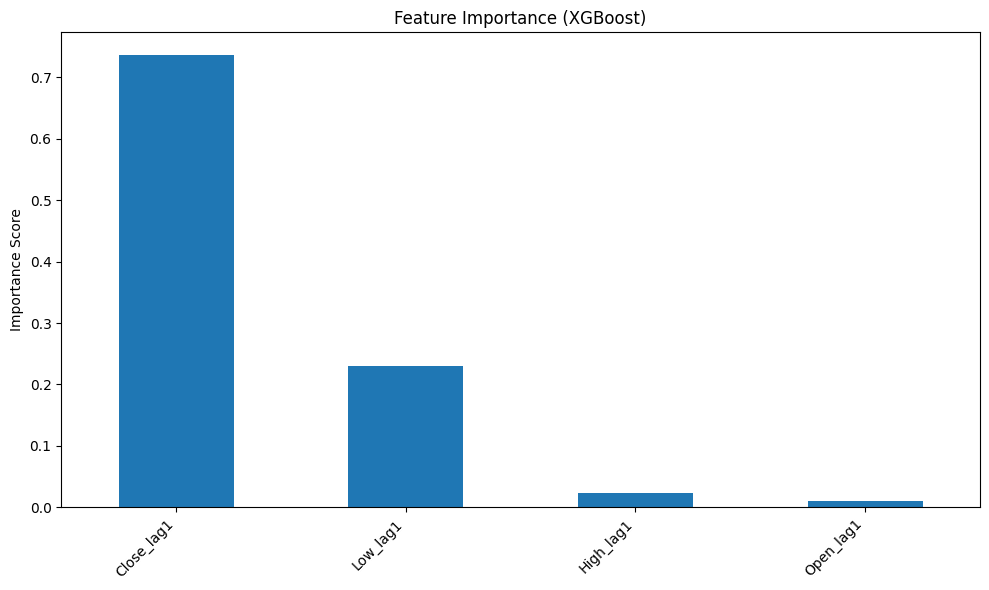

In [10]:
selected_features = ['Close_lag1', 'Open_lag1', 'High_lag1', 'Low_lag1']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
model = XGBoostModel(n_estimators=200, learning_rate=0.05, max_depth=5)
model.train(X_train_selected, y_train)
metrics = model.evaluate(X_test_selected, y_test)
model.plot_results(X_test_selected, y_test)
model.plot_feature_importance(selected_features)

### 3. LSTM (Long Short-Term Memory)

**File:** `lstm_model.py`

- Deep learning model using `Keras`
- Uses sequences of `time_steps=60`
- Handles reshaping, training, evaluation

**Evaluation:**

- RMSE: \$7,563.33
- MAE:  \$6,195.27
- R²:   0.8165 ✅

**Notes:**

LSTM models are explicitly designed for **sequential data** and **time-series forecasting**. They maintain memory over past observations, making them highly suited for **financial data with temporal dependencies**.

Advantages:

- Captures temporal patterns
- Handles sequences and lagged dependencies
- Scalable with deeper architectures (e.g., stacked LSTM, Bidirectional LSTM)

Opportunities for improvement:

- Longer training and more epochs with regularization
- Use of **external data** (sentiment, macroeconomic indicators)
- Applying **hybrid models** (e.g., ARIMA + LSTM or CNN-LSTM)

> ✅ *Conclusion:* Best candidate for this problem type. With more data and advanced tuning, LSTM would likely outperform all others.


[*********************100%***********************]  1 of 1 completed

Data downloaded successfully.
📊 Starting data preprocessing pipeline (v2)...
🔁 Creating lagged features for 1 days...

Adding datetime features...
datetime features Added
Adding technical indicators...
Technical indicators added.
✅ Preprocessing complete.

Splitting data for time series...
Data split complete: 1736 rows for training, 435 rows for testing.
Data scaling complete.

--- Step 4: Building, training, and evaluating the LSTM model ---
LSTM model initialized with time_steps=60.
Preparing data into sequences...
Sequence shapes: X_train_seq=(1676, 60, 15), y_train_seq=(1676,)
LSTM model built successfully.



C:\Users\sepehr\cryptoPredictions\cryptoPredictions\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        13,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,701 (135.55 KB)

 Trainable params: 34,701 (135.55 KB)

 Non-trainable params: 0 (0.00 B)


Training the LSTM model... (This can take a significant amount of time)
Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0303
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0053
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0036
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0032
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0029
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0027
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0031
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0024
Epoch 9/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0026
Epoch 10/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0020
Epoch 11/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0020
Epoch 12/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0020
Epoch 13/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0020
Epoch 14/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.002

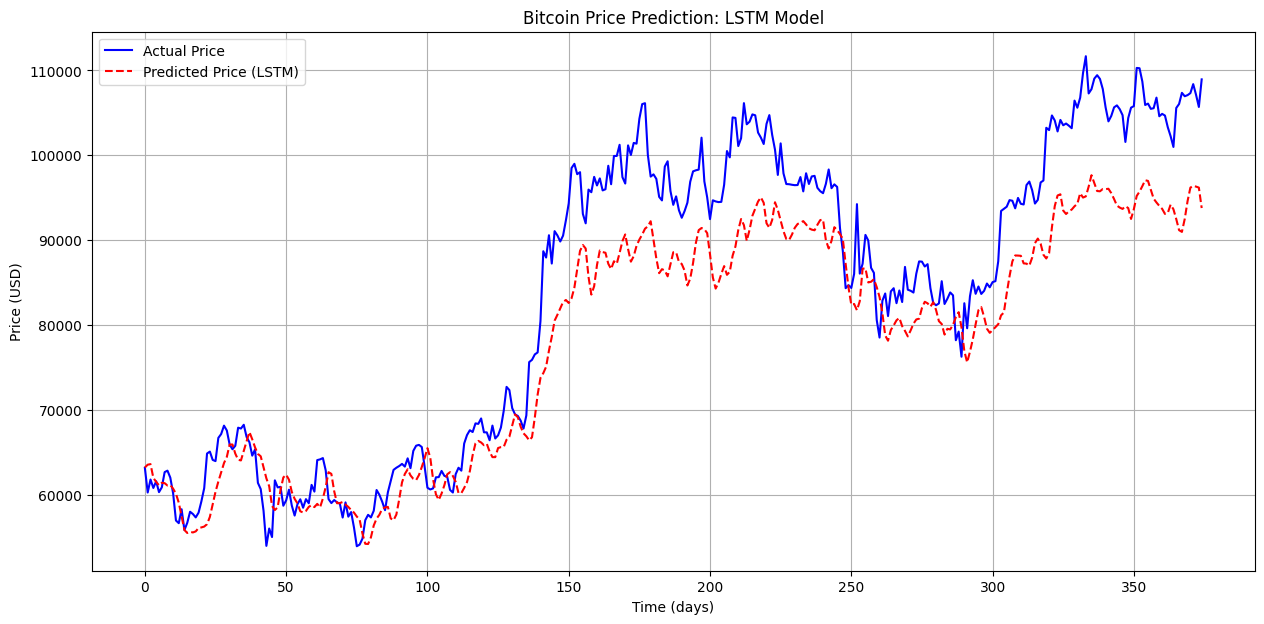

In [11]:
df = get_crypto_data(period= "6y")
df, scaler = data_preprocessing(
    df,
    lag_days=1,
    add_datetime_features_flag=True,
    add_technical_flag=True,
    scale_data_flag=False
)


X_train, X_test, y_train, y_test = split_data_for_time_series(
    df, 
    target_column='Close', 
    train_ratio=0.8
)
feature_scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = feature_scaler.fit_transform(X_train)
X_test_scaled = feature_scaler.transform(X_test)
y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = target_scaler.transform(y_test.values.reshape(-1, 1))

print("Data scaling complete.")


print("\n--- Step 4: Building, training, and evaluating the LSTM model ---")
lstm_model = LSTMModel(time_steps=60)


history = lstm_model.train(X_train_scaled, y_train_scaled.flatten(), epochs=50, batch_size=32)

metrics_lstm = lstm_model.evaluate_and_plot(
    X_test_scaled, 
    y_test_scaled.flatten(), 
    feature_scaler= feature_scaler,
    target_scaler=target_scaler
)